# Dip Ass # 04

# Task#01

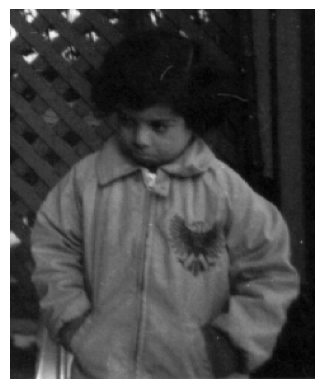

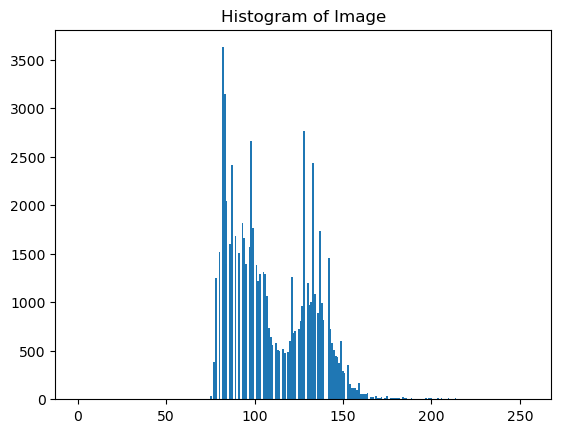

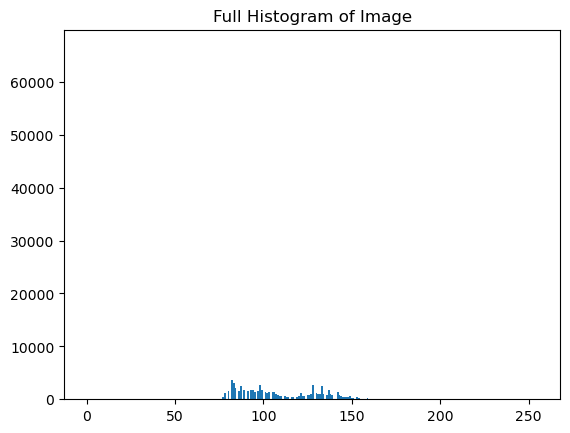

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the image
img = io.imread('pout.tif')

# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# Display the histogram of the image
plt.hist(img.ravel(), bins=256, range=[0, 255])
plt.title('Histogram of Image')
plt.show()

# Display the full histogram of the image
plt.hist(img.ravel(), bins=256, range=[0, 255])
plt.title('Full Histogram of Image')
plt.ylim([0, np.prod(img.shape)])
plt.show()


# Task#02

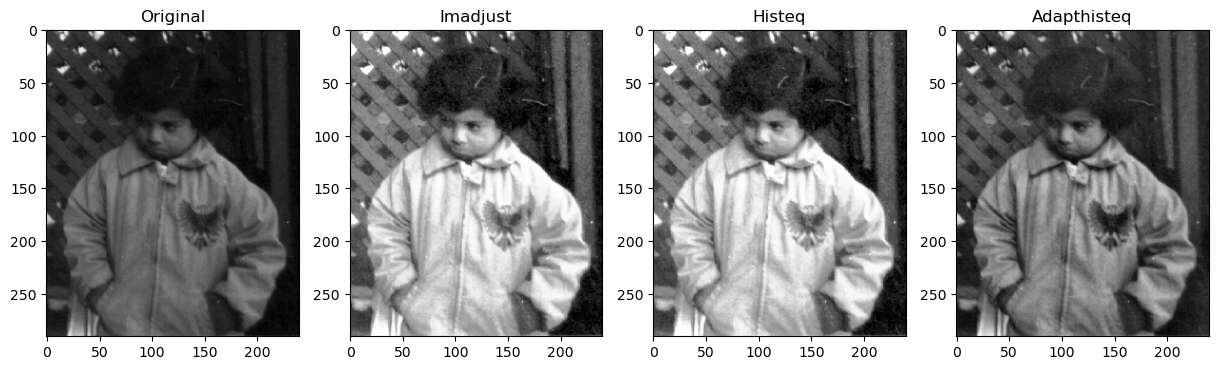

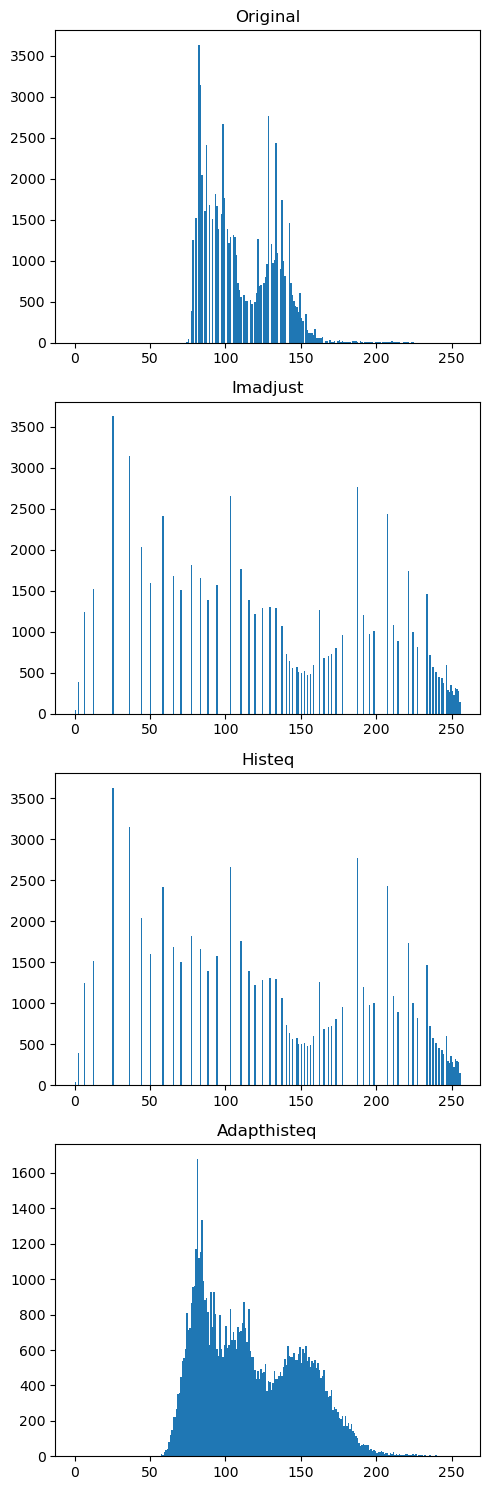

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('pout.tif', 0)

# Perform image adjustments
img_adjust = cv2.equalizeHist(img)
img_equal = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_adapt = clahe.apply(img)

# Display the images using Matplotlib
fig, axs = plt.subplots(1, 4, figsize=(15, 15))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(img_adjust, cmap='gray')
axs[1].set_title('Imadjust')

axs[2].imshow(img_equal, cmap='gray')
axs[2].set_title('Histeq')

axs[3].imshow(img_adapt, cmap='gray')
axs[3].set_title('Adapthisteq')

# Plot the histograms
fig, axs = plt.subplots(4, 1, figsize=(5, 15))

axs[0].hist(img.ravel(), 256, [0, 256])
axs[0].set_title('Original')

axs[1].hist(img_adjust.ravel(), 256, [0, 256])
axs[1].set_title('Imadjust')

axs[2].hist(img_equal.ravel(), 256, [0, 256])
axs[2].set_title('Histeq')

axs[3].hist(img_adapt.ravel(), 256, [0, 256])
axs[3].set_title('Adapthisteq')

plt.tight_layout()
plt.show()


plt.show()


# Task#03

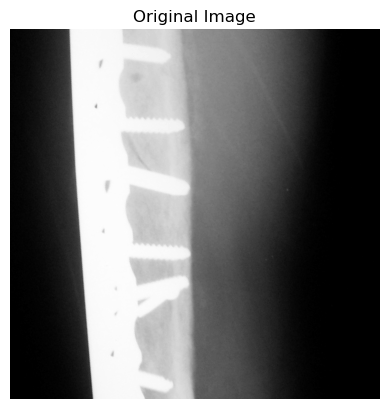

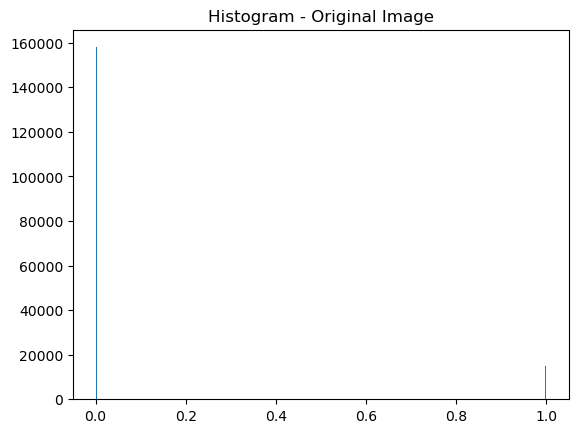

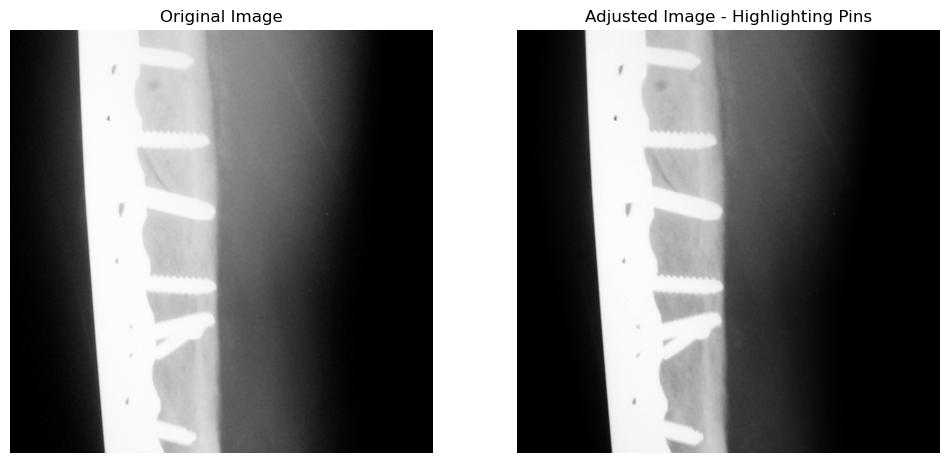

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure

# Load the image
xrayImg = io.imread('armxray.png', as_gray=True)
# Display the image
plt.imshow(xrayImg, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Display the histogram
plt.hist(xrayImg.ravel(), bins=256, range=[0, 1])
plt.title('Histogram - Original Image')
plt.show()

# Adjust the brightness range to highlight the pins
xrayPins = exposure.adjust_gamma(xrayImg, gamma=1.5, gain=1)

# Display the original image and the adjusted image side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(xrayImg, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(xrayPins, cmap='gray')
axs[1].set_title('Adjusted Image - Highlighting Pins')
axs[1].axis('off')
plt.show()

# Adjust the brightness range to focus on bone and tissue
myXray = exposure.adjust_gamma(xrayImg)



# TasK#04

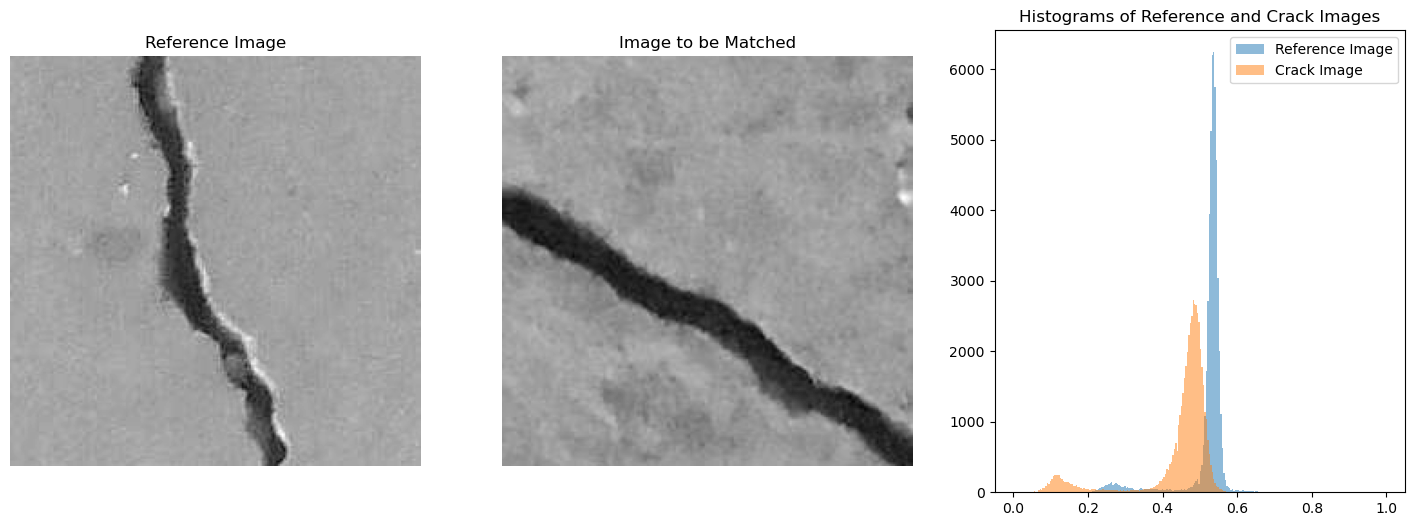

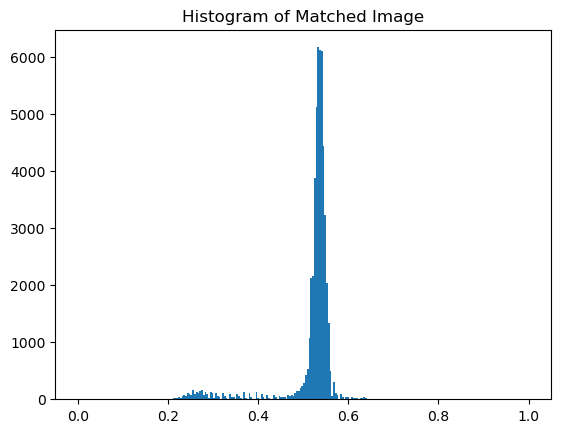

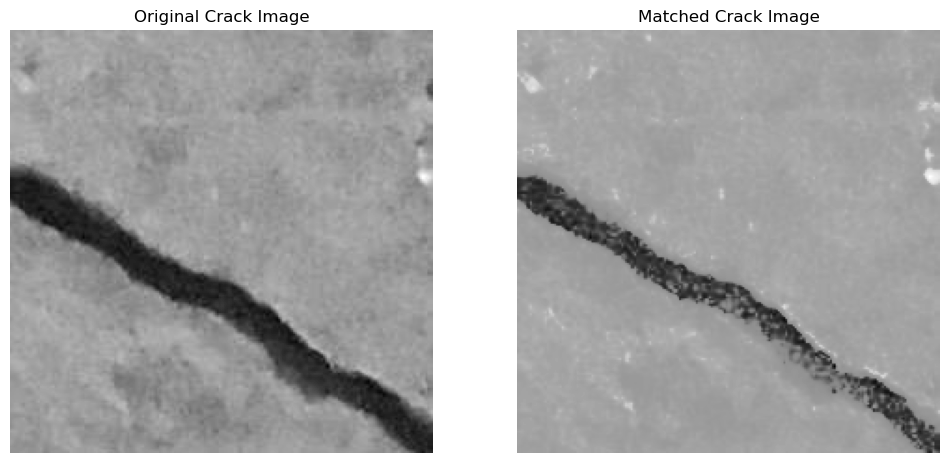

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, img_as_uint
from skimage.exposure import match_histograms

# Load the reference image
refImg = io.imread('00001.jpg', as_gray=True)

# Load the image to be matched
crackImg = io.imread('00115.jpg', as_gray=True)

# Display the reference and crack images side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(refImg, cmap='gray')
axs[0].set_title('Reference Image')
axs[0].axis('off')

axs[1].imshow(crackImg, cmap='gray')
axs[1].set_title('Image to be Matched')
axs[1].axis('off')

# Compute and display the histograms of the reference and crack images
axs[2].hist(refImg.ravel(), bins=256, range=[0, 1], alpha=0.5, label='Reference Image')
axs[2].hist(crackImg.ravel(), bins=256, range=[0, 1], alpha=0.5, label='Crack Image')
axs[2].legend()
axs[2].set_title('Histograms of Reference and Crack Images')

plt.show()

# Match the histogram of the crack image to that of the reference image
matchedImg = match_histograms(crackImg, refImg, channel_axis=None)

# Display the histogram of the matched image
plt.hist(matchedImg.ravel(), bins=256, range=[0, 1])
plt.title('Histogram of Matched Image')
plt.show()

# Convert the matched image to 8-bit unsigned integer format for display purposes
matchedImg = img_as_uint(matchedImg)

# Display the crack image and the matched image side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(crackImg, cmap='gray')
axs[0].set_title('Original Crack Image')
axs[0].axis('off')

axs[1].imshow(matchedImg, cmap='gray')
axs[1].set_title('Matched Crack Image')
axs[1].axis('off')

plt.show()


# Task#05

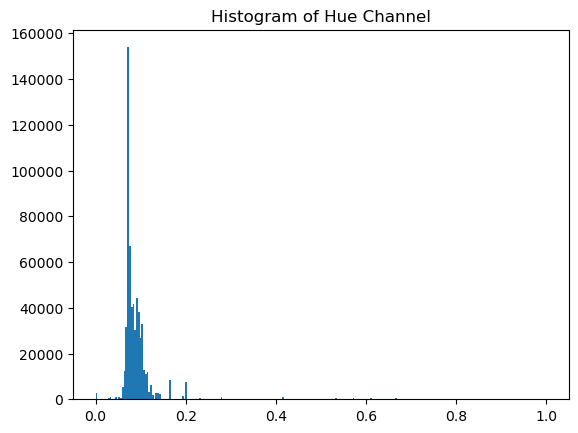

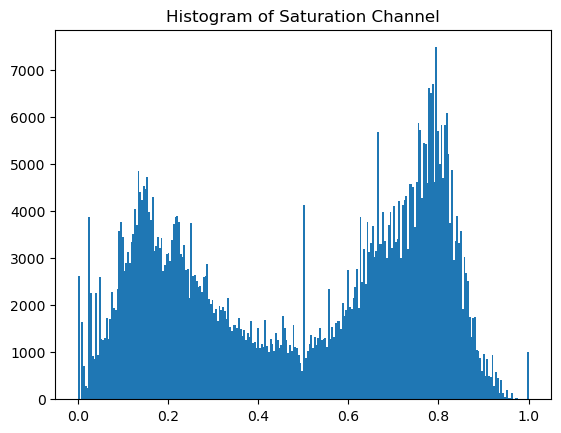

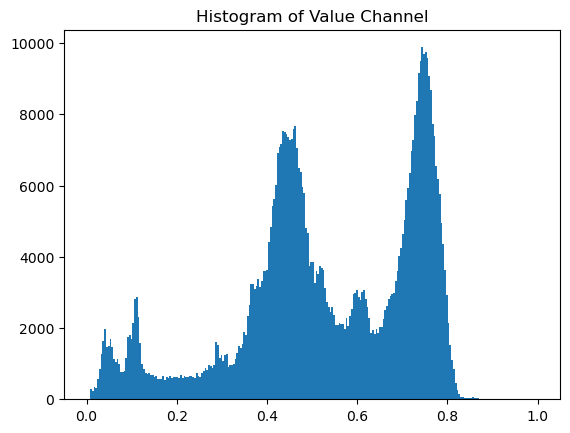

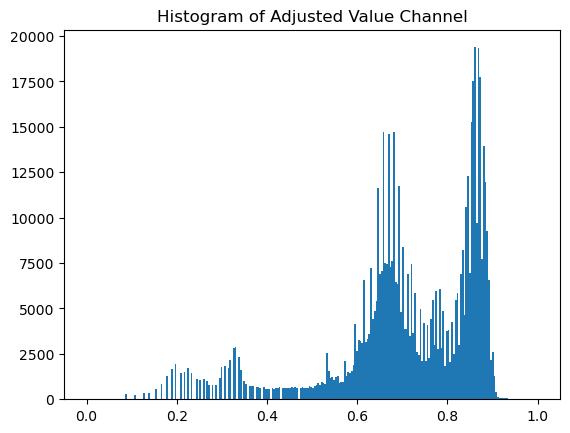

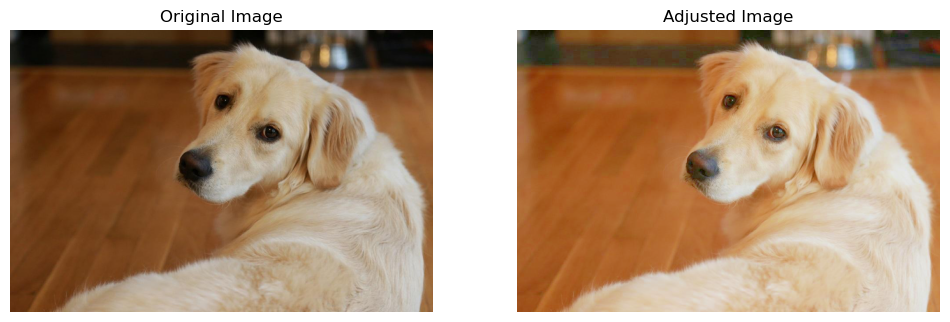

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure

# Load the RGB image
rgbImg = io.imread("sherlock.jpg")

# Convert the RGB image to HSV color space
hsvImg = color.rgb2hsv(rgbImg)

# Display the histogram of the hue channel
plt.hist(hsvImg[:, :, 0].ravel(), bins=256, range=[0, 1])
plt.title('Histogram of Hue Channel')
plt.show()

# Display the histogram of the saturation channel
plt.hist(hsvImg[:, :, 1].ravel(), bins=256, range=[0, 1])
plt.title('Histogram of Saturation Channel')
plt.show()

# Display the histogram of the value channel
plt.hist(hsvImg[:, :, 2].ravel(), bins=256, range=[0, 1])
plt.title('Histogram of Value Channel')
plt.show()

# Adjust the value channel using imadjust function
hsvImg[:, :, 2] = exposure.adjust_gamma(hsvImg[:, :, 2], gamma=0.5, gain=1)

# Display the histogram of the adjusted value channel
plt.hist(hsvImg[:, :, 2].ravel(), bins=256, range=[0, 1])
plt.title('Histogram of Adjusted Value Channel')
plt.show()

# Convert the HSV image back to RGB color space
newImg = color.hsv2rgb(hsvImg)

# Display the original and adjusted images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(rgbImg)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(newImg)
axs[1].set_title('Adjusted Image')
axs[1].axis('off')
plt.show()
